In [1]:
import pandas as pd
import numpy as np

In [2]:
datafile = "Office_Supply_Campaign_Results_7-23-19.csv"
#datafile = "Office Supply Campaign ResultS 7-23-19 processed.csv"
#data = pd.read_csv(datafile)
data_org = pd.read_csv(datafile)

data_proc = pd.read_csv(datafile)
data_proc.columns = [col.strip().lower().replace(' ','_') for col in data_proc.columns]
#data2 = data2.dropna(how='any')

#data_org = pd.read_csv(datafile,index_col='Customer Number')
#can check if language column is effective

In [3]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null object
Historical Sales Volume              16172 non-null object
Date of First Purchase               16172 non-null object
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null object
Do Not Email                         16172 non-null object
Do Not Telemarket                    16172 non-null object
Repurchase Method                    16172 non-null object
Last Transaction Channel             15730 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-null object
Comp

In [4]:
data_proc

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,...,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
0,86734.0,$238.70,"$146,803.43",1968-10-01,15.0,False,False,False,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,06-Oct,English
1,97098.0,$281.68,"$439,984.16",1981-06-15,22.0,False,False,False,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,Nov-50,English
2,100836.0,$432.86,"$970,465.71",1962-11-01,19.0,False,False,False,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,06-Oct,English
3,116390.0,$-,"$230,193.60",1983-06-01,17.0,False,False,False,NOTICE,PHONE,...,N,N,N,N,N,N,N,Y,01-May,English
4,127914.0,"$1,370.17","$27,403.33",1987-07-15,21.0,False,False,False,NOTICE,BRANCH (PHONE),...,N,N,N,N,N,Y,N,N,,NaN
5,148529.0,$308.42,"$182,584.08",1979-05-15,16.0,False,False,False,NOTICE,MAIL,...,N,N,N,N,N,N,Y,Y,06-Oct,English
6,163829.0,$-,"$151,252.50",1986-11-15,6.0,False,False,False,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,51-100,English
7,164322.0,$-,"$1,377,761.00",1985-09-01,21.0,False,False,False,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,51-100,NaN
8,166859.0,"$2,241.50","$609,688.00",1978-02-01,32.0,False,True,False,NOTICE,MAIL,...,N,N,N,N,N,Y,N,N,,NaN
9,170336.0,$223.44,"$277,512.48",1982-07-01,18.0,False,False,False,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,01-May,English


In [5]:
def print_uniques(data):
    print('# OF UNIQUE VALUES')
    for col in data.columns:
        uniq_vals = list(data[col].unique())
        length_vals = len(uniq_vals)
        print('{0} --> {1}'.format(col, length_vals))
        max_iteration = 10 if 10 < length_vals else length_vals
        for i in range(max_iteration):
            val = uniq_vals[i]
            print('\t',val)
def print_val_counts(data):
    print('VALUES DISTRIBUTION')
    excluded_columns = []
    for col in data.columns:
        uniq_vals = list(data[col].unique())
        length_vals = len(uniq_vals)
        if(length_vals < 10):
            print('\t{0} --> {1}'.format(col, length_vals))
            print(data[col].value_counts())
        else:
            excluded_columns.append(col)
    print("EXCLUDED: {0}".format(excluded_columns))

In [6]:
print_uniques(data_proc)

# OF UNIQUE VALUES
customer_number --> 16173
	 86734.0
	 97098.0
	 100836.0
	 116390.0
	 127914.0
	 148529.0
	 163829.0
	 164322.0
	 166859.0
	 170336.0
campaign_period_sales --> 4261
	 $238.70 
	 $281.68 
	 $432.86 
	  $-   
	 $1,370.17 
	 $308.42 
	 $2,241.50 
	 $223.44 
	 $124.76 
	 $110.33 
historical_sales_volume --> 16149
	 $146,803.43 
	 $439,984.16 
	 $970,465.71 
	 $230,193.60 
	 $27,403.33 
	 $182,584.08 
	 $151,252.50 
	 $1,377,761.00 
	 $609,688.00 
	 $277,512.48 
date_of_first_purchase --> 3494
	 1968-10-01
	 1981-06-15
	 1962-11-01
	 1983-06-01
	 1987-07-15
	 1979-05-15
	 1986-11-15
	 1985-09-01
	 1978-02-01
	 1982-07-01
number_of_prior_year_transactions --> 62
	 15.0
	 22.0
	 19.0
	 17.0
	 21.0
	 16.0
	 6.0
	 32.0
	 18.0
	 10.0
do_not_direct_mail_solicit --> 3
	 False
	 True
	 nan
do_not_email --> 3
	 False
	 True
	 nan
do_not_telemarket --> 3
	 False
	 True
	 nan
repurchase_method --> 4
	 AUTO RENEW
	 NOTICE
	 PAYMENT PLAN
	 nan
last_transaction_channel --> 9
	 AUTO REN

In [7]:
#handle communication preferences
def convert_boolean_2_int(value):
    try:
        if(not value):
            return 0
        elif(value):
            return 1
        else:
            return np.NaN
    except:
        return np.NaN

#handle last purchase details
def convert_YN_2_int(value):
    try:
        if(value.upper()=='N'):
            return 0
        elif(value.upper()=='Y' or value.upper()=='YY'):
            return 1
        else:
            return np.NaN
    except:
        return np.NaN
    
print('END') 

END


In [8]:
data_proc['do_not_direct_mail_solicit'] = data_proc['do_not_direct_mail_solicit'].apply(convert_boolean_2_int)
data_proc['do_not_email'] = data_proc['do_not_email'].apply(convert_boolean_2_int)
data_proc['do_not_telemarket'] = data_proc['do_not_telemarket'].apply(convert_boolean_2_int)
print('END')           

END


In [9]:
data_proc['desk'] = data_proc['desk'].apply(convert_YN_2_int)
data_proc['executive_chair'] = data_proc['executive_chair'].apply(convert_YN_2_int)
data_proc['standard_chair'] = data_proc['standard_chair'].apply(convert_YN_2_int)
data_proc['monitor'] = data_proc['monitor'].apply(convert_YN_2_int)
data_proc['printer'] = data_proc['printer'].apply(convert_YN_2_int)
data_proc['computer'] = data_proc['computer'].apply(convert_YN_2_int)
data_proc['insurance'] = data_proc['insurance'].apply(convert_YN_2_int)
data_proc['toner'] = data_proc['toner'].apply(convert_YN_2_int)
data_proc['office_supplies'] = data_proc['office_supplies'].apply(convert_YN_2_int)
print('END')           

END


In [10]:
###Hanlde NaNs

#Drop
na_values_drop_row_set = [
    'customer_number',
    'campaign_period_sales',
    'historical_sales_volume',
    'date_of_first_purchase',
    'number_of_prior_year_transactions',
    'do_not_direct_mail_solicit',
    'do_not_email',
    'do_not_telemarket',
    'repurchase_method',
    'desk',
    'executive_chair',
    'standard_chair',
    'monitor',
    'printer',
    'computer',
    'insurance',
    'toner',
    'office_supplies']
data_proc = data_proc.dropna(subset=na_values_drop_row_set)
data_proc = data_proc.set_index('customer_number')

#Replace
na_values_replacement_map = {
    'last_transaction_channel':'UNKNOWN', 
    'number_of_employees':'UNKNOWN',
    'language':'UNKNOWN'}
data_proc = data_proc.fillna(value = na_values_replacement_map)
data_proc = data_proc.replace({'number_of_employees': r'\s'}, {'number_of_employees': 'UNKNOWN'}, regex=True)
print('END')           


END


In [11]:
#Fix Values
#print(data_proc['language'].value_counts())

data_proc = data_proc.replace({'number_of_employees': {'06-Oct': '06-10', 'Nov-50': '11-50', '01-May': '01-05'}})

#print(data_proc['repurchase_method'].value_counts())

data_proc = data_proc[data_proc.repurchase_method != 'PAYMENT PLAN']



print('END')    

END


In [12]:
#Fix values 2
def convert_str_2_float(value):
    try:
        if isinstance(value, float):
            return value
        value = value.replace('$','')
        value = value.replace(',','')
        value = value.replace('-','0.0')
        value = value.replace('(','-')
        value = value.replace(')','')
        value = value.replace(r'\s','')
        return float(value)
    except:
        return np.NaN

test =convert_str_2_float('($22.5)')
#print(type(test), test)
print("END")

END


In [13]:
data_proc['campaign_period_sales'] = data_proc['campaign_period_sales'].apply(convert_str_2_float)
#data_proc.loc[data_proc['campaign_period_sales']<0]
data_proc = data_proc[data_proc.campaign_period_sales >= 0]
data_proc['historical_sales_volume'] = data_proc['historical_sales_volume'].apply(convert_str_2_float)
#data_proc.loc[data_proc['historical_sales_volume']<0]
data_proc = data_proc[data_proc.historical_sales_volume >= 0]


In [14]:
print(data_proc.loc[data_proc['campaign_period_sales']<0])
print(data_proc.loc[data_proc['historical_sales_volume']<0])
print(data_proc.loc[data_proc['number_of_prior_year_transactions']<0])

Empty DataFrame
Columns: [campaign_period_sales, historical_sales_volume, date_of_first_purchase, number_of_prior_year_transactions, do_not_direct_mail_solicit, do_not_email, do_not_telemarket, repurchase_method, last_transaction_channel, desk, executive_chair, standard_chair, monitor, printer, computer, insurance, toner, office_supplies, number_of_employees, language]
Index: []
Empty DataFrame
Columns: [campaign_period_sales, historical_sales_volume, date_of_first_purchase, number_of_prior_year_transactions, do_not_direct_mail_solicit, do_not_email, do_not_telemarket, repurchase_method, last_transaction_channel, desk, executive_chair, standard_chair, monitor, printer, computer, insurance, toner, office_supplies, number_of_employees, language]
Index: []
Empty DataFrame
Columns: [campaign_period_sales, historical_sales_volume, date_of_first_purchase, number_of_prior_year_transactions, do_not_direct_mail_solicit, do_not_email, do_not_telemarket, repurchase_method, last_transaction_channe

In [15]:
#Fix Values 3
#Cast date values
from datetime import datetime

def str_to_date(s):
    try:
        if(isinstance(s,datetime)):
            d = s
        else:
            d = datetime.strptime(s, '%Y-%m-%d')
    except:
        d = datetime.strptime('1919-05-19', '%Y-%m-%d')
    return d

#print(str_to_date("1979-02-15"))
data_proc['date_of_first_purchase'] = data_proc['date_of_first_purchase'].apply(str_to_date)
#print(data_proc['date_of_first_purchase'])

In [16]:
#Fix Values 4
def update_language(lan):
    if(lan == "English" or lan == "UNKNOWN"):
        return lan
    else:
        return "OTHER"

data_proc['language'] = data_proc['language'].apply(update_language)
print("END")

END


In [17]:
import seaborn as sns; 
import matplotlib.pyplot as plt


In [18]:
#Correlations heatmap. (Thanks Chris Shaw @https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b)
def get_correlations_heatmap(data, size=(20,10)):
    correlations = np.around(data.corr(), decimals=2)
    mask = np.zeros_like(correlations, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=size)
    sns.set(font_scale=1.4)
    sns.heatmap(correlations,
                vmin=-1,
                cmap='coolwarm',
                annot=True,
                mask = mask);
    #plt.xticks(rotation=60)
    plt.show()

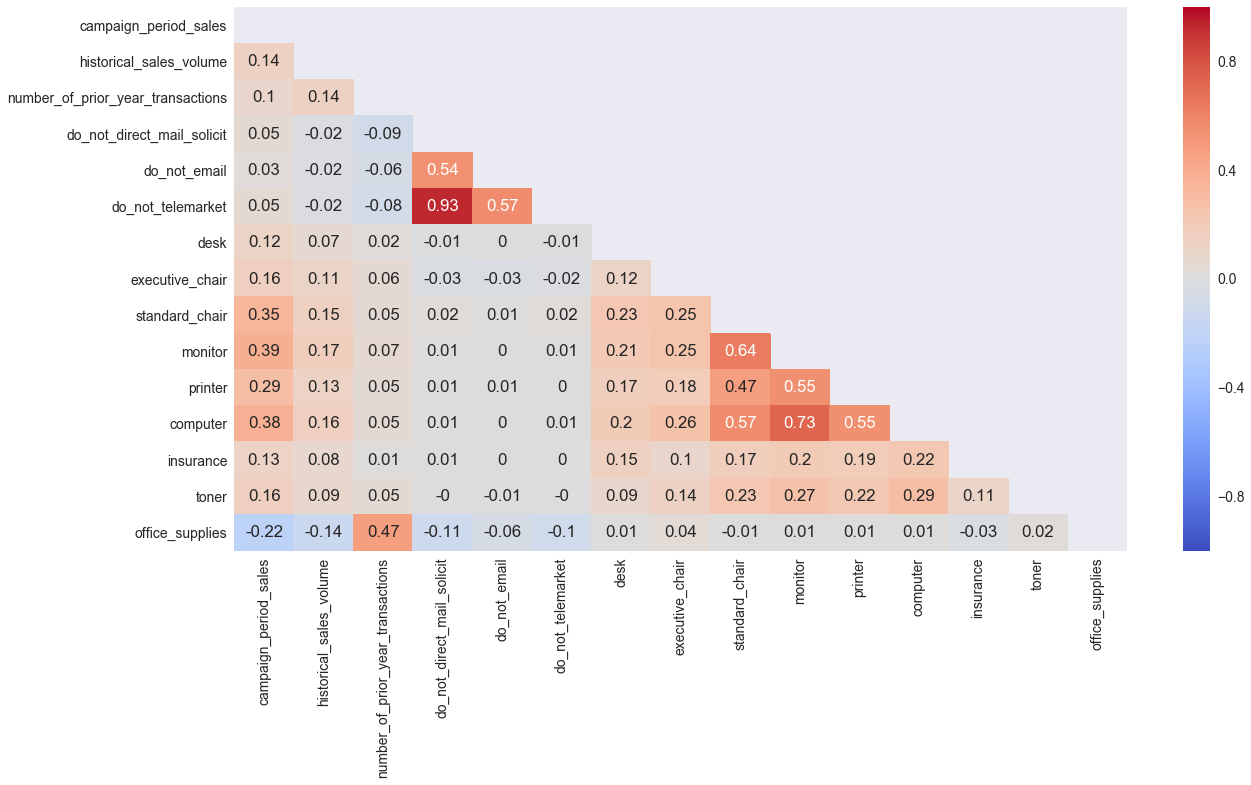

In [19]:
get_correlations_heatmap(data_proc)

In [20]:
#Communication Preferences
#from matplotlib_venn import venn3
# Make the diagram --- Very bad postioning, so cancel
#venn3(subsets = (146, 1929, 22, 10, 112, 10, 1440), set_labels = ('do_not_direct_mail', 'do_not_email', 'do_not_telemarket'))
#plt.show()

data_proc.groupby(['do_not_direct_mail_solicit','do_not_email','do_not_telemarket']).size().reset_index()#.sort_values(by=['0'], ascending=[False])


,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,0
0,0,0,0,12473
1,0,0,1,10
2,0,1,0,1929
3,0,1,1,10
4,1,0,0,146
5,1,0,1,112
6,1,1,0,39
7,1,1,1,1440


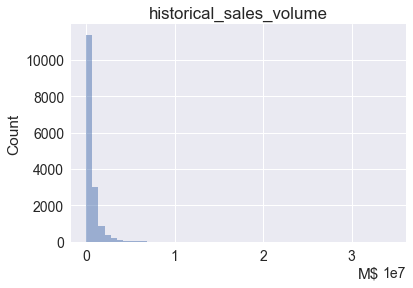

,historical_sales_volume
count,"16,159.0"
mean,"672,082.1"
std,"956,857.6"
min,"1,319.3"
25%,"190,264.3"
50%,"396,607.6"
75%,"788,459.8"
max,"34,412,125.8"


In [21]:
pd.options.display.float_format = '{:,.1f}'.format
data_proc[['historical_sales_volume']].hist(alpha=0.5,bins=50)
plt.ylabel('Count')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel('M$', x=0.92, ha='right')
plt.show()
data_proc[['historical_sales_volume']].describe()

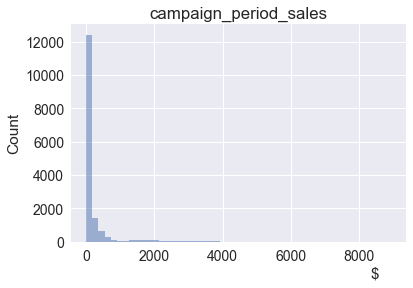

,campaign_period_sales
count,"16,159.0"
mean,246.0
std,720.3
min,0.0
25%,0.0
50%,0.0
75%,145.8
max,"8,936.9"


In [22]:
pd.options.display.float_format = '{:,.1f}'.format
data_proc[['campaign_period_sales']].hist(alpha=0.5,bins=50)
plt.ylabel('Count')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel('$', x=0.92, ha='right')
plt.show()
data_proc[['campaign_period_sales']].describe()

In [23]:
print(data_proc.info())
print_uniques(data_proc)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 16159 entries, 86734.0 to 167235933.0
Data columns (total 20 columns):
campaign_period_sales                16159 non-null float64
historical_sales_volume              16159 non-null float64
date_of_first_purchase               16159 non-null datetime64[ns]
number_of_prior_year_transactions    16159 non-null float64
do_not_direct_mail_solicit           16159 non-null int64
do_not_email                         16159 non-null int64
do_not_telemarket                    16159 non-null int64
repurchase_method                    16159 non-null object
last_transaction_channel             16159 non-null object
desk                                 16159 non-null float64
executive_chair                      16159 non-null float64
standard_chair                       16159 non-null float64
monitor                              16159 non-null float64
printer                              16159 non-null float64
computer                             1

In [24]:
##Add new columns
def add_new_columns(data):
    data["bought_during_campaign"] = np.where(data['campaign_period_sales'] > 0 , 1, 0)
    data["years_since_first_transaction"] = data["date_of_first_purchase"].apply(lambda x : datetime.strptime('2019-11-01', '%Y-%m-%d').year-x.year)
    data = pd.concat([data, pd.get_dummies(data["repurchase_method"], prefix='rm')], axis=1)
    data = pd.concat([data, pd.get_dummies(data["last_transaction_channel"], prefix='ltc')], axis=1)
    data["ltc_int_key"] =  data["last_transaction_channel"].apply(lambda x : 1 if x == "MAIL" else 
                                                                          2 if x == "AUTO RENEW" else
                                                                          3 if x == "WEB" else
                                                                          4 if x == "PHONE" else
                                                                          5 if x == "BRANCH (POS)" else
                                                                          6 if x == "BRANCH (PHONE)" else
                                                                          7 if x == "BILLING" else
                                                                          8 if x == "IT" else 9)
    data["avg_emp_count"] = data["number_of_employees"].apply(lambda x : 8 if x == "UNKNOWN" else 
                                                                          3 if x == "01-05" else
                                                                          8 if x == "06-10" else
                                                                          30 if x == "11-50" else
                                                                          75 if x == "51-100" else
                                                                          300 if x == "101-500" else 500)
    data = pd.concat([data, pd.get_dummies(data["language"])], axis=1)
    data['yearly_average_purchase'] = data.apply(lambda row: row.historical_sales_volume/row.years_since_first_transaction, axis=1)
    data.columns = [col.strip().lower().replace(' ','_') for col in data.columns]
    #print(print_uniques(data))
    return data

In [25]:
########################CREATE A NEW CPY HERE
data_full_with_new_col = data_proc.copy()
data_full_with_new_col = add_new_columns(data_full_with_new_col)
data_full_with_new_col = data_full_with_new_col[data_full_with_new_col.years_since_first_transaction >= 0]
print("END")

END


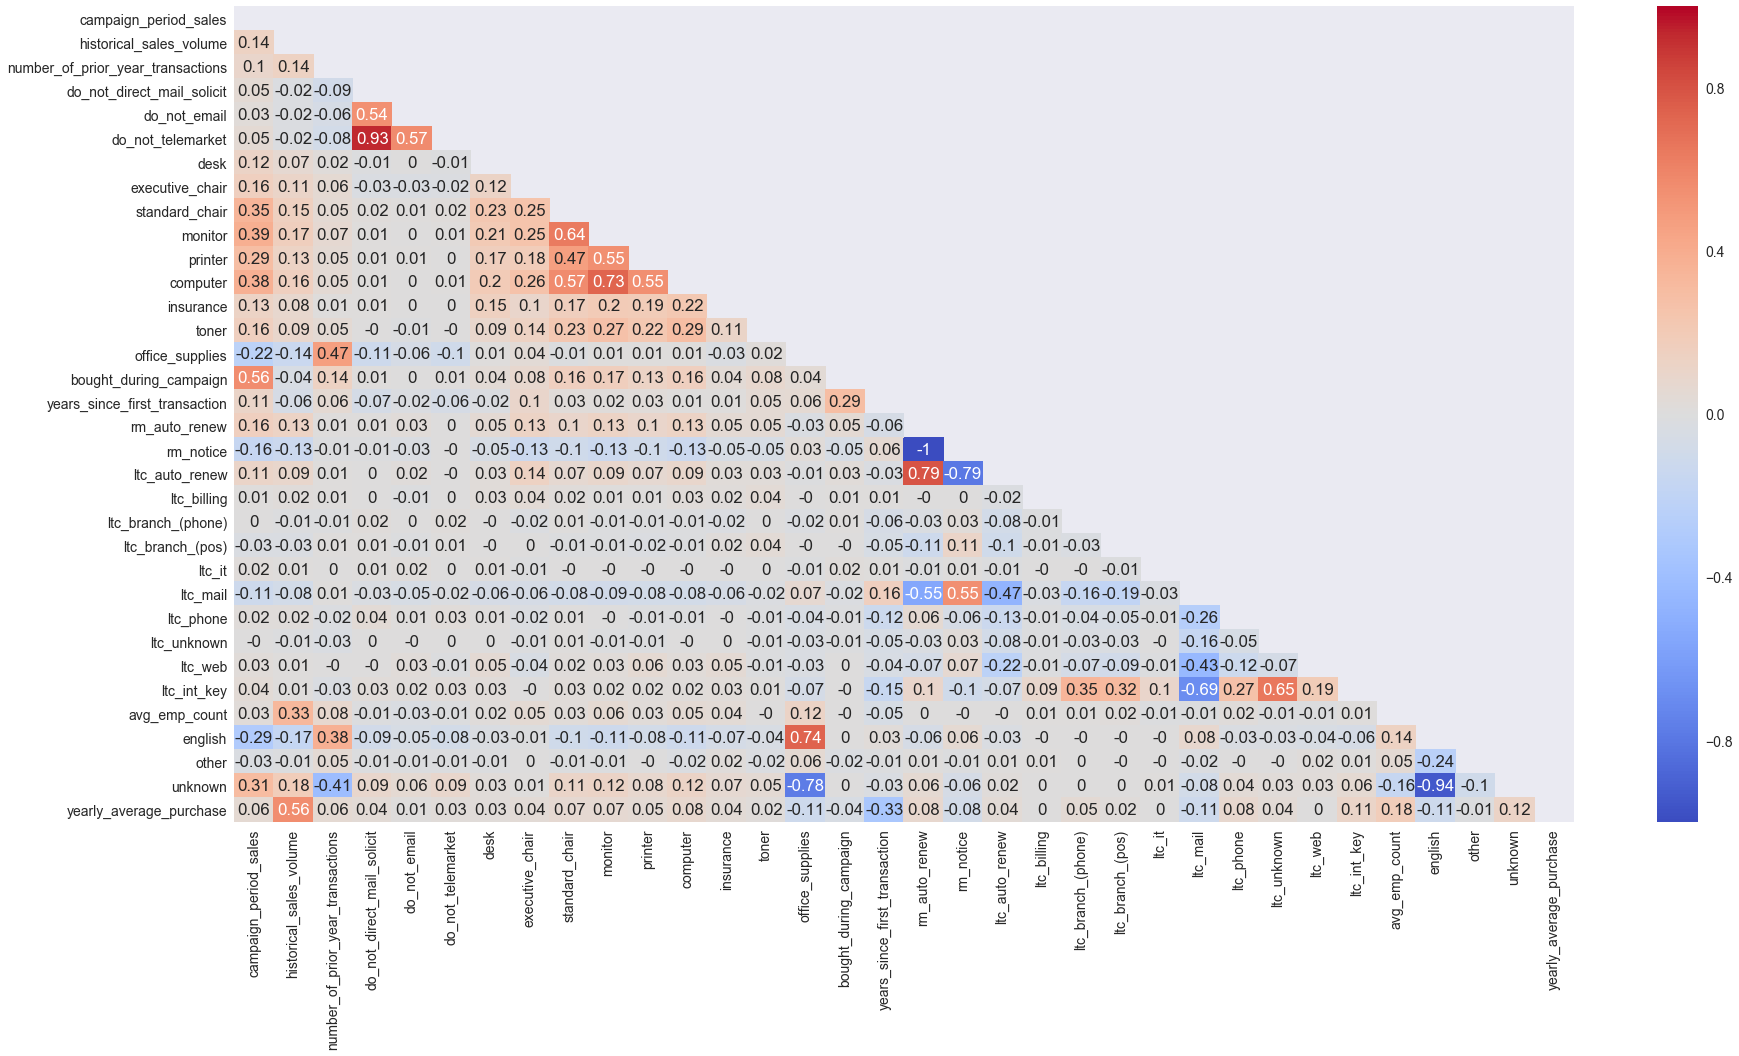

In [26]:
get_correlations_heatmap(data_full_with_new_col, size=(30,15))

In [27]:
########################CREATE A SUBSET OF PAID HERE
data_paid = data_full_with_new_col.loc[data_full_with_new_col['campaign_period_sales']>0]
data_not_paid = data_full_with_new_col.loc[data_full_with_new_col['campaign_period_sales']<=0]

In [28]:
print_val_counts(data_full_with_new_col)
print_val_counts(data_paid)

VALUES DISTRIBUTION
	do_not_direct_mail_solicit --> 2
0    14421
1     1737
Name: do_not_direct_mail_solicit, dtype: int64
	do_not_email --> 2
0    12740
1     3418
Name: do_not_email, dtype: int64
	do_not_telemarket --> 2
0    14586
1     1572
Name: do_not_telemarket, dtype: int64
	repurchase_method --> 2
NOTICE        11892
AUTO RENEW     4266
Name: repurchase_method, dtype: int64
	last_transaction_channel --> 9
MAIL              7764
AUTO RENEW        3141
WEB               2643
PHONE             1095
BRANCH (POS)       632
UNKNOWN            441
BRANCH (PHONE)     411
BILLING             17
IT                  14
Name: last_transaction_channel, dtype: int64
	desk --> 2
0.0    15246
1.0      912
Name: desk, dtype: int64
	executive_chair --> 2
0.0    15001
1.0     1157
Name: executive_chair, dtype: int64
	standard_chair --> 2
0.0    15877
1.0      281
Name: standard_chair, dtype: int64
	monitor --> 2
0.0    15860
1.0      298
Name: monitor, dtype: int64
	printer --> 2
0.0    15732
1.

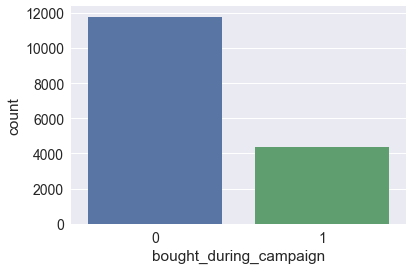

In [29]:
#sns.boxplot(data_paid['campaign_period_sales'])
sns.countplot(data_full_with_new_col.bought_during_campaign)

In [30]:
###MORE EDA

In [31]:
print(data_full_with_new_col.info())
print_val_counts(data_full_with_new_col)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 16158 entries, 86734.0 to 167235933.0
Data columns (total 39 columns):
campaign_period_sales                16158 non-null float64
historical_sales_volume              16158 non-null float64
date_of_first_purchase               16158 non-null datetime64[ns]
number_of_prior_year_transactions    16158 non-null float64
do_not_direct_mail_solicit           16158 non-null int64
do_not_email                         16158 non-null int64
do_not_telemarket                    16158 non-null int64
repurchase_method                    16158 non-null object
last_transaction_channel             16158 non-null object
desk                                 16158 non-null float64
executive_chair                      16158 non-null float64
standard_chair                       16158 non-null float64
monitor                              16158 non-null float64
printer                              16158 non-null float64
computer                             1

In [32]:
#print_val_counts(data_paid)
#0    3926
#1     451
paid_telemarket_0 = 3926 / (3926+451)
paid_telemarket_1 = 451 / (3926+451)
#print_val_counts(data_not_paid)
#0    10660
#1     1121
not_paid_telemarket_0 = 10660 / (10660+1121)
not_paid_telemarket_1 = 1121 / (10660+1121)

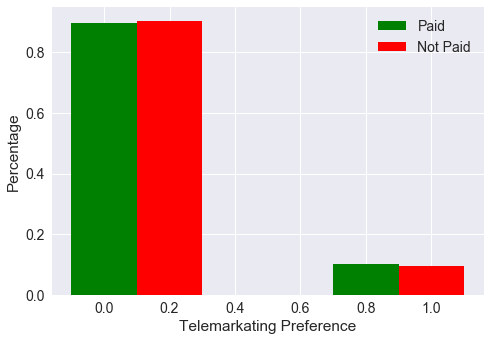

In [33]:
pd.options.display.float_format = '{:,.1f}'.format
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar([0,0.8], [paid_telemarket_0, paid_telemarket_1], width=0.2, color='g', align='center', label='Paid')
ax.bar([0.2,1], [not_paid_telemarket_0, not_paid_telemarket_1], width=0.2, color='r', align='center', label='Not Paid')
ax.set_ylabel('Percentage')
ax.set_xlabel('Telemarkating Preference')
ax.legend()
plt.show()

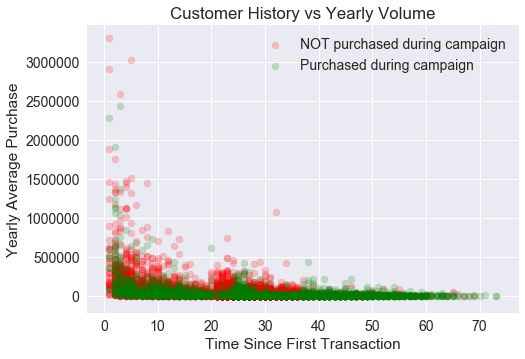

,yearly_average_purchase
count,"16,158.0"
mean,"39,931.0"
std,"102,813.5"
min,51.5
25%,"7,206.8"
50%,"16,474.7"
75%,"36,721.7"
max,"3,304,854.0"


In [34]:
pd.options.display.float_format = '{:,.1f}'.format
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(data_not_paid["years_since_first_transaction"], data_not_paid['yearly_average_purchase'], color='r', label='NOT purchased during campaign', alpha=0.2)
ax.scatter(data_paid["years_since_first_transaction"], data_paid['yearly_average_purchase'], color='g', label='Purchased during campaign', alpha=0.2)
ax.set_ylabel('Yearly Average Purchase')
ax.set_xlabel('Time Since First Transaction')
ax.set_title('Customer History vs Yearly Volume')
ax.legend()
plt.show()
data_full_with_new_col[['yearly_average_purchase']].describe()

In [35]:
#REGRESSION
print(data_full_with_new_col.info())
#print(data_full_with_new_col.groupby('bought_during_campaign').mean())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 16158 entries, 86734.0 to 167235933.0
Data columns (total 39 columns):
campaign_period_sales                16158 non-null float64
historical_sales_volume              16158 non-null float64
date_of_first_purchase               16158 non-null datetime64[ns]
number_of_prior_year_transactions    16158 non-null float64
do_not_direct_mail_solicit           16158 non-null int64
do_not_email                         16158 non-null int64
do_not_telemarket                    16158 non-null int64
repurchase_method                    16158 non-null object
last_transaction_channel             16158 non-null object
desk                                 16158 non-null float64
executive_chair                      16158 non-null float64
standard_chair                       16158 non-null float64
monitor                              16158 non-null float64
printer                              16158 non-null float64
computer                             1

In [36]:
#CLASSIFICATION

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
###Model Inputs 
selected_columns = ['years_since_first_transaction','yearly_average_purchase','historical_sales_volume','number_of_prior_year_transactions','avg_emp_count']
#,'ltc_int_key','monitor','office_supplies','do_not_email','insurance'

y = data_full_with_new_col.bought_during_campaign
x = data_full_with_new_col[selected_columns]
'''
selected_columns = ['historical_sales_volume', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'desk', 'executive_chair', 'standard_chair', 'monitor', 'printer',
       'computer', 'insurance', 'toner', 'office_supplies',
       'years_since_first_transaction', 'rm_auto_renew', 'rm_notice', 'ltc_auto_renew', 'ltc_billing',
       'ltc_branch_(phone)', 'ltc_branch_(pos)', 'ltc_it', 'ltc_mail',
       'ltc_phone', 'ltc_unknown', 'ltc_web', 'ltc_int_key', 'avg_emp_count',
       'english', 'other', 'unknown', 'yearly_average_purchase']
       
['historical_sales_volume', 'number_of_prior_year_transactions', 
                     'years_since_first_transaction','monitor']
                     
x = data_full_with_new_col[['historical_sales_volume', 'number_of_prior_year_transactions', 
                     'years_since_first_transaction', 'rm_auto_renew', 'rm_notice', 'ltc_int_key', 
                     'avg_emp_count', 'english','other','unknown', 'do_not_direct_mail_solicit','standard_chair',
                     'monitor','printer','computer','historical_sales_volume','toner', 'office_supplies']]

x = data_full_with_new_col[['yearly_average_purchase','standard_chair','monitor','printer','computer','historical_sales_volume',
                           'toner', 'office_supplies', 'do_not_email','do_not_telemarket','avg_emp_count', 'rm_notice', 
                            'ltc_int_key','english','other','unknown']]
'''


"\nselected_columns = ['historical_sales_volume', 'number_of_prior_year_transactions',\n       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',\n       'desk', 'executive_chair', 'standard_chair', 'monitor', 'printer',\n       'computer', 'insurance', 'toner', 'office_supplies',\n       'years_since_first_transaction', 'rm_auto_renew', 'rm_notice', 'ltc_auto_renew', 'ltc_billing',\n       'ltc_branch_(phone)', 'ltc_branch_(pos)', 'ltc_it', 'ltc_mail',\n       'ltc_phone', 'ltc_unknown', 'ltc_web', 'ltc_int_key', 'avg_emp_count',\n       'english', 'other', 'unknown', 'yearly_average_purchase']\n       \n['historical_sales_volume', 'number_of_prior_year_transactions', \n                     'years_since_first_transaction','monitor']\n                     \nx = data_full_with_new_col[['historical_sales_volume', 'number_of_prior_year_transactions', \n                     'years_since_first_transaction', 'rm_auto_renew', 'rm_notice', 'ltc_int_key', \n                     

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(len(y_train), len(y_test))

12926 3232


In [39]:
log_reg_model = LogisticRegression(class_weight='balanced')
log_reg_model_fit = log_reg_model.fit(x_train, y_train)
y_pred = log_reg_model_fit.predict(x_test)
y_proba = log_reg_model_fit.predict_proba(x_test)[:,1]
log_reg_model_score = log_reg_model_fit.score(x_test, y_test)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred)
log_reg_acc_score = accuracy_score(y_test, y_pred)
print("y_pred\n",y_pred)
print("y_proba\n",y_proba)
print("log_reg_model_score\n",log_reg_model_score)
print("log_reg_conf_matrix\n",log_reg_conf_matrix)
print("log_reg_acc_score\n",log_reg_acc_score)

y_pred
 [1 1 1 ... 1 1 1]
y_proba
 [0.59562566 0.55057019 0.50575693 ... 0.61110497 0.53393633 0.56633261]
log_reg_model_score
 0.3657178217821782
log_reg_conf_matrix
 [[ 398 1939]
 [ 111  784]]
log_reg_acc_score
 0.3657178217821782


In [40]:
dec_tree_model = DecisionTreeClassifier()
dec_tree_model_fit = dec_tree_model.fit(x_train, y_train)
y_pred = dec_tree_model_fit.predict(x_test)
y_proba = dec_tree_model_fit.predict_proba(x_test)[:,1]
dec_tree_model_score = dec_tree_model_fit.score(x_test, y_test)
dec_tree_conf_matrix = confusion_matrix(y_test, y_pred)
dec_tree_acc_score = accuracy_score(y_test, y_pred)
print("y_pred\n",y_pred)
print("y_proba\n",y_proba)
print("dec_tree_model_score\n",dec_tree_model_score)
print("dec_tree_conf_matrix\n",dec_tree_conf_matrix)
print("dec_tree_acc_score\n",dec_tree_acc_score)

y_pred
 [1 1 0 ... 1 0 1]
y_proba
 [1. 1. 0. ... 1. 0. 1.]
dec_tree_model_score
 0.7778465346534653
dec_tree_conf_matrix
 [[1969  368]
 [ 350  545]]
dec_tree_acc_score
 0.7778465346534653


In [41]:
rand_for_model = RandomForestClassifier()
rand_for_model_fit = rand_for_model.fit(x_train, y_train)
y_pred = rand_for_model_fit.predict(x_test)
y_proba = rand_for_model_fit.predict_proba(x_test)[:,1]
rand_for_model_score = rand_for_model_fit.score(x_test, y_test)
rand_for_conf_matrix = confusion_matrix(y_test, y_pred)
rand_for_acc_score = accuracy_score(y_test, y_pred)
print("y_pred\n",y_pred)
print("y_proba\n",y_proba)
print("rand_for_model_score\n",rand_for_model_score)
print("rand_for_conf_matrix\n",rand_for_conf_matrix)
print("rand_for_acc_score\n",rand_for_acc_score)

y_pred
 [0 0 0 ... 1 1 1]
y_proba
 [0.5 0.4 0.  ... 1.  0.6 0.6]
rand_for_model_score
 0.833230198019802
rand_for_conf_matrix
 [[2143  194]
 [ 345  550]]
rand_for_acc_score
 0.833230198019802


In [198]:
grid_params = {'max_depth' : [5, 10, 15, 20], 'criterion' : ['gini', 'entropy']}
grid = GridSearchCV(rand_for_model_fit, param_grid = grid_params, cv=5)
grid_fit = grid.fit(x_train, y_train)
y_proba = grid_fit.predict_proba(x_test)[:,1]
grid_score = grid_fit.score(x_test, y_test)
grid_best_params = grid_fit.best_params_
print("y_proba\n",y_proba)
print("grid_score\n",grid_score)
print("grid_best_params\n",grid_best_params)
print("")

y_proba
 [0.09345911 0.09210905 0.04805715 ... 0.00407528 0.91026363 0.08716459]
grid_score
 0.8533415841584159
grid_best_params
 {'criterion': 'entropy', 'max_depth': 10}



In [42]:
rand_for_model = RandomForestClassifier(max_depth = 10, criterion = 'gini')
rand_for_model_fit = rand_for_model.fit(x_train, y_train)
y_pred = rand_for_model_fit.predict(x_test)
y_proba = rand_for_model_fit.predict_proba(x_test)[:,1]
rand_for_model_score = rand_for_model_fit.score(x_test, y_test)
rand_for_conf_matrix = confusion_matrix(y_test, y_pred)
rand_for_acc_score = accuracy_score(y_test, y_pred)
print("y_pred\n",y_pred)
print("y_proba\n",y_proba)
print("rand_for_model_score\n",rand_for_model_score)
print("rand_for_conf_matrix\n",rand_for_conf_matrix)
print("rand_for_acc_score\n",rand_for_acc_score)

y_pred
 [1 0 0 ... 1 0 1]
y_proba
 [0.55759766 0.25704711 0.22273042 ... 0.87950039 0.18356403 0.73323131]
rand_for_model_score
 0.8425123762376238
rand_for_conf_matrix
 [[2179  158]
 [ 351  544]]
rand_for_acc_score
 0.8425123762376238


In [43]:
#print(log_reg_model_fit.feature_importances_)
def get_feature_importance(model,X):
    col_sorted_by_importance=model.feature_importances_.argsort()
    feat_imp=pd.DataFrame({
        'feature':X.columns[col_sorted_by_importance],
        'importance':np.round(model.feature_importances_[col_sorted_by_importance],2)
    })
    return feat_imp
print(get_feature_importance(dec_tree_model_fit, x_train))
print(get_feature_importance(rand_for_model_fit, x_train))
#print(grid_fit.feature_importances_)

                             feature  importance
0                      avg_emp_count         0.0
1  number_of_prior_year_transactions         0.1
2            historical_sales_volume         0.2
3            yearly_average_purchase         0.2
4      years_since_first_transaction         0.5
                             feature  importance
0                      avg_emp_count         0.0
1  number_of_prior_year_transactions         0.1
2            historical_sales_volume         0.1
3            yearly_average_purchase         0.1
4      years_since_first_transaction         0.7


In [200]:
print(data_full_with_new_col.shape)
print(x.shape)
data_full_with_new_col["purchase_prob"] = grid_fit.predict_proba(x)[:,1]
data_full_with_new_col.head()

(16158, 43)
(16158, 5)


,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,...,ltc_int_key,avg_emp_count,english,other,unknown,yearly_average_purchase,purchase_prob,estimated_transaction,estimated_profit,campaign_profit
customer_number,,,,,,,,,,,,,,,,,,,,,
"86,734.0",238.7,"146,803.4",1968-10-01,15.0,0,0,0,AUTO RENEW,AUTO RENEW,0.0,...,2,8,1,0,0,"2,878.5",0.9,262.9,-1.1,-1.5
"97,098.0",281.7,"439,984.2",1981-06-15,22.0,0,0,0,NOTICE,MAIL,0.0,...,1,30,1,0,0,"11,578.5",0.8,331.9,19.0,7.9
"100,836.0",432.9,"970,465.7",1962-11-01,19.0,0,0,0,NOTICE,MAIL,0.0,...,1,8,1,0,0,"17,025.7",0.9,440.5,42.9,41.2
"116,390.0",0.0,"230,193.6",1983-06-01,17.0,0,0,0,NOTICE,PHONE,0.0,...,4,3,1,0,0,"6,394.3",0.1,749.6,-30.0,-45.6
"127,914.0","1,370.2","27,403.3",1987-07-15,21.0,0,0,0,NOTICE,BRANCH (PHONE),0.0,...,6,8,0,0,1,856.4,0.3,"1,520.3",84.8,247.4


In [202]:
# REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

In [244]:
# Model Inputs
selected_colums2 = ['historical_sales_volume', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'desk', 'executive_chair', 'standard_chair', 'monitor', 'printer',
       'computer', 'insurance', 'toner', 'office_supplies',
       'years_since_first_transaction', 'rm_auto_renew', 'rm_notice', 'ltc_auto_renew', 'ltc_billing',
       'ltc_branch_(phone)', 'ltc_branch_(pos)', 'ltc_it', 'ltc_mail',
       'ltc_phone', 'ltc_unknown', 'ltc_web', 'ltc_int_key', 'avg_emp_count',
       'english', 'other', 'unknown', 'yearly_average_purchase']

'''
['unknown','historical_sales_volume','number_of_prior_year_transactions','avg_emp_count','']
['historical_sales_volume', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'desk', 'executive_chair', 'standard_chair', 'monitor', 'printer',
       'computer', 'insurance', 'toner', 'office_supplies',
       'years_since_first_transaction', 'rm_auto_renew', 'rm_notice', 'ltc_auto_renew', 'ltc_billing',
       'ltc_branch_(phone)', 'ltc_branch_(pos)', 'ltc_it', 'ltc_mail',
       'ltc_phone', 'ltc_unknown', 'ltc_web', 'ltc_int_key', 'avg_emp_count',
       'english', 'other', 'unknown', 'yearly_average_purchase']

['historical_sales_volume', 'number_of_prior_year_transactions', 
                     'years_since_first_transaction']
x = data_full_with_new_col[['historical_sales_volume', 'number_of_prior_year_transactions', 
                     'years_since_first_transaction', 'rm_auto_renew', 'rm_notice', 'ltc_int_key', 
                     'avg_emp_count', 'english','other','unknown', 'do_not_direct_mail_solicit','standard_chair',
                     'monitor','printer','computer','historical_sales_volume','toner', 'office_supplies']]

x = data_full_with_new_col[['yearly_average_purchase','standard_chair','monitor','printer','computer','historical_sales_volume',
                           'toner', 'office_supplies', 'do_not_email','do_not_telemarket','avg_emp_count', 'rm_notice', 
                            'ltc_int_key','english','other','unknown']]
'''

y2 = data_paid.campaign_period_sales
x2 = data_paid[selected_colums2]



In [245]:
x_train, x_test, y_train, y_test = train_test_split(x2,y2,test_size=0.2)
print(len(y_train), len(y_test))

3501 876


In [256]:
#num_of_feat = 2

In [259]:
best_n = 0
best_mse = 1e10
model_score = 0
best_columns_linear = []
best_model_linear = LinearRegression()
for i in range(1,10):
    num_of_feat = i
    lin_reg_model = LinearRegression()
    selected_features = get_important_features(lin_reg_model, num_of_feat, x_train, y_train)
    x_train_sel_feat = x_train[selected_features]
    x_test_sel_feat = x_test[selected_features]
    lin_reg_model_fit = lin_reg_model.fit(x_train_sel_feat, y_train)
    y_pred = lin_reg_model_fit.predict(x_test_sel_feat)
    lin_reg_model_score = lin_reg_model_fit.score(x_test_sel_feat, y_test)
    lin_reg_mse = mean_squared_error(y_test, y_pred)
    if(best_mse > lin_reg_mse):
        best_n = i
        model_score = lin_reg_model_score
        best_mse = lin_reg_mse
        best_columns_linear = selected_features
        best_model_linear = lin_reg_model_fit
    #print("y_pred\n",y_pred)
    #print(i,"\tlin_reg_model_score\t",lin_reg_model_score,"\tlin_reg_mse\t",lin_reg_mse)
    
print("SELECTION")
print(best_n,"\tlin_reg_model_score\t",model_score,"\tlin_reg_mse\t",best_mse)
print('columns\t',best_columns_linear)

SELECTION
7 	lin_reg_model_score	 0.5552153457229451 	lin_reg_mse	 597406.0304953196
columns	 ['monitor' 'computer' 'office_supplies' 'rm_auto_renew' 'rm_notice'
 'ltc_it' 'english' 'other' 'unknown']


In [265]:
best_n = 0
best_mse = 1e10
model_score = 0
best_columns_dec_tree = []
best_model_dec_tree = DecisionTreeRegressor()
for i in range(1,10):
    num_of_feat = i
    dec_tree_model = DecisionTreeRegressor(max_depth = 6)
    selected_features = get_important_features(dec_tree_model, num_of_feat, x_train, y_train)
    x_train_sel_feat = x_train[selected_features]
    x_test_sel_feat = x_test[selected_features]
    dec_tree_model_fit = dec_tree_model.fit(x_train_sel_feat, y_train)
    y_pred = dec_tree_model_fit.predict(x_test_sel_feat)
    dec_tree_model_score = dec_tree_model_fit.score(x_test_sel_feat, y_test)
    dec_tree_mse = mean_squared_error(y_test, y_pred)
    if(best_mse > dec_tree_mse):
        best_n = i
        model_score = dec_tree_model_score
        best_mse = dec_tree_mse
        best_columns_dec_tree = selected_features
        best_model_dec_tree = dec_tree_model_fit
    #print("y_pred\n",y_pred)
    #print(i,"\tdec_tree_model_score\t",dec_tree_model_score,"\tdec_tree_mse\t",dec_tree_mse)
    
print("SELECTION")
print(best_n,"\tdec_tree_model_score\t",model_score,"\tdec_tree_mse\t",best_mse)
print('columns\t',best_columns_dec_tree)

SELECTION
7 	dec_tree_model_score	 0.759755938922575 	dec_tree_mse	 322680.31169290165
columns	 ['historical_sales_volume' 'number_of_prior_year_transactions' 'monitor'
 'office_supplies' 'rm_notice' 'avg_emp_count' 'unknown']


In [270]:
best_n = 0
best_mse = 1e10
model_score = 0
best_columns_rand_for = []
best_model_rand_for = RandomForestRegressor()
for i in range(1,15):
    num_of_feat = i
    rand_for_reg_model = RandomForestRegressor(n_estimators=100)
    selected_features = get_important_features(rand_for_reg_model, num_of_feat, x_train, y_train)
    x_train_sel_feat = x_train[selected_features]
    x_test_sel_feat = x_test[selected_features]
    rand_for_reg_model_fit = rand_for_reg_model.fit(x_train_sel_feat, y_train)
    y_pred = rand_for_reg_model_fit.predict(x_test_sel_feat)
    rand_for_reg_model_score = rand_for_reg_model_fit.score(x_test_sel_feat, y_test)
    rand_for_reg_mse = mean_squared_error(y_test, y_pred)
    if(best_mse > rand_for_reg_mse):
        best_n = i
        model_score = rand_for_reg_model_score
        best_mse = rand_for_reg_mse
        best_columns_rand_for = selected_features
        best_model_rand_for = rand_for_reg_model_fit
    #print("y_pred\n",y_pred)
    #print(i,"\trand_for_reg_model_score\t",rand_for_reg_model_score,"\trand_for_reg_mse\t",rand_for_reg_mse)

print("SELECTION")
print(best_n,"\trand_for_reg_model_score\t",model_score,"\trand_for_reg_mse\t",best_mse)
print('columns\t',best_columns_rand_for)


1 	rand_for_reg_model_score	 0.44051071475094006 	rand_for_reg_mse	 751469.8850134026
2 	rand_for_reg_model_score	 0.45521008144168007 	rand_for_reg_mse	 731726.6447260699
3 	rand_for_reg_model_score	 0.654332776451019 	rand_for_reg_mse	 464277.89697102393
4 	rand_for_reg_model_score	 0.6826791904502048 	rand_for_reg_mse	 426204.82384858176
5 	rand_for_reg_model_score	 0.7196860169000359 	rand_for_reg_mse	 376499.64387433784
6 	rand_for_reg_model_score	 0.7388802233627827 	rand_for_reg_mse	 350719.2250106183
7 	rand_for_reg_model_score	 0.7388502747166161 	rand_for_reg_mse	 350759.4500985412
8 	rand_for_reg_model_score	 0.7644715060881297 	rand_for_reg_mse	 316346.666332571
9 	rand_for_reg_model_score	 0.7966583294950099 	rand_for_reg_mse	 273115.403246366
10 	rand_for_reg_model_score	 0.7942422732648015 	rand_for_reg_mse	 276360.4939842386
11 	rand_for_reg_model_score	 0.7950996440154148 	rand_for_reg_mse	 275208.92894740246
12 	rand_for_reg_model_score	 0.8043742561966511 	rand_for_r

In [214]:
'''
grid_params = {'max_depth': [i for i in range(2,15)],'min_samples_split': [i for i in range(4,20)]}
gs_dec_tree_model = GridSearchCV(DecisionTreeRegressor(), param_grid = grid_params, cv = 5)
gs_dec_tree_model_fit = gs_dec_tree_model.fit(x_train, y_train)
gs_dec_tree_model_score = gs_dec_tree_model_fit.score(x_test, y_test)
grid_best_params = gs_dec_tree_model_fit.best_params_
#print("y_pred\n",y_pred)
print("gs_dec_tree_model_score\n",gs_dec_tree_model_score)
print("grid_best_params\n",grid_best_params)
'''

'\ngrid_params = {\'max_depth\': [i for i in range(2,15)],\'min_samples_split\': [i for i in range(4,20)]}\ngs_dec_tree_model = GridSearchCV(DecisionTreeRegressor(), param_grid = grid_params, cv = 5)\ngs_dec_tree_model_fit = gs_dec_tree_model.fit(x_train, y_train)\ngs_dec_tree_model_score = gs_dec_tree_model_fit.score(x_test, y_test)\ngrid_best_params = gs_dec_tree_model_fit.best_params_\n#print("y_pred\n",y_pred)\nprint("gs_dec_tree_model_score\n",gs_dec_tree_model_score)\nprint("grid_best_params\n",grid_best_params)\n'

In [215]:
'''
grid_params = {'max_depth': [i for i in range(2, 15)],'min_samples_split': [i for i in range(4, 20)]}
gs_rand_for_model = GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid = grid_params, cv = 5)
gs_rand_for_model_fit = gs_rand_for_model.fit(x_train, y_train) #np.ravel(y_train)
gs_rand_for_model_score = gs_rand_for_model_fit.score(x_test, y_test)
grid_best_params = gs_rand_for_model_fit.best_params_
#print("y_pred\n",y_pred)
print("gs_rand_for_model_score\n",gs_dec_tree_model_score)
print("grid_best_params\n",grid_best_params)
'''

'\ngrid_params = {\'max_depth\': [i for i in range(2, 15)],\'min_samples_split\': [i for i in range(4, 20)]}\ngs_rand_for_model = GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid = grid_params, cv = 5)\ngs_rand_for_model_fit = gs_rand_for_model.fit(x_train, y_train) #np.ravel(y_train)\ngs_rand_for_model_score = gs_rand_for_model_fit.score(x_test, y_test)\ngrid_best_params = gs_rand_for_model_fit.best_params_\n#print("y_pred\n",y_pred)\nprint("gs_rand_for_model_score\n",gs_dec_tree_model_score)\nprint("grid_best_params\n",grid_best_params)\n'

In [216]:
'''
grid_params = {'poly__degree': [2, 3, 4, 5]}
gs_pip_model = GridSearchCV(Pipeline([('poly', PolynomialFeatures()), ('lr', LinearRegression())]), param_grid = grid_params, cv = 10)
gs_pip_model_fit = gs_pip_model.fit(x_train, y_train)
gs_pip_model_score = gs_pip_model_fit.score(x_test, y_test)
grid_best_params = gs_pip_model_fit.best_params_
#print("y_pred\n",y_pred)
print("gs_pip_model_score\n",gs_pip_model_score)
print("grid_best_params\n",grid_best_params)
'''

'\ngrid_params = {\'poly__degree\': [2, 3, 4, 5]}\ngs_pip_model = GridSearchCV(Pipeline([(\'poly\', PolynomialFeatures()), (\'lr\', LinearRegression())]), param_grid = grid_params, cv = 10)\ngs_pip_model_fit = gs_pip_model.fit(x_train, y_train)\ngs_pip_model_score = gs_pip_model_fit.score(x_test, y_test)\ngrid_best_params = gs_pip_model_fit.best_params_\n#print("y_pred\n",y_pred)\nprint("gs_pip_model_score\n",gs_pip_model_score)\nprint("grid_best_params\n",grid_best_params)\n'

In [249]:
pipe_model = Pipeline([('poly', PolynomialFeatures()), ('lr', LinearRegression())])
selected_features = ['historical_sales_volume', 'number_of_prior_year_transactions', 'years_since_first_transaction','avg_emp_count']
x_train_sel_feat = x_train[selected_features]
x_test_sel_feat = x_test[selected_features]
pipe_model_fit = pipe_model.fit(x_train, y_train)
y_pred = pipe_model_fit.predict(x_test)
pipe_model_score = pipe_model_fit.score(x_test, y_test)
pipe_mse = mean_squared_error(y_test, y_pred)
#print("y_pred\n",y_pred)
print("pipe_model_score\n",pipe_model_score)
print("pipe_mse\n",pipe_mse)

pipe_model_score
 -38.29682753649383
pipe_mse
 52780961.581945054


In [218]:
'''
ols_model = sm.OLS(y_train, x_train, missing='drop')
ols_model_fit = ols_model.fit()
y_pred = rand_for_reg_model_fit.predict(x_test)
#ols_model_score = ols_model_fit.(x_test, y_test)
print("y_pred\n",y_pred)
#print("ols_model_score\n",ols_model_score)
'''

'\nols_model = sm.OLS(y_train, x_train, missing=\'drop\')\nols_model_fit = ols_model.fit()\ny_pred = rand_for_reg_model_fit.predict(x_test)\n#ols_model_score = ols_model_fit.(x_test, y_test)\nprint("y_pred\n",y_pred)\n#print("ols_model_score\n",ols_model_score)\n'

In [258]:
def get_important_features(model, n, X, Y):
    feat_selector  = RFE(model, n)
    feat_selector.fit_transform(X, Y)
   
    # check selected features
    features_bool = np.array(feat_selector.support_)
    features = np.array(X.columns)
    result = features[features_bool]
    #print(result)

    # check ranking of features
    features_rank = feat_selector.ranking_
    #print(features_rank)
    rank = features_rank[features_bool]
    #print(rank)
    
    feat_imp=pd.DataFrame({
        'rank':features_rank,
        'feature':features
    }).sort_values(by=['rank'])
    #print(feat_imp)
    return result 

In [273]:
print(data_full_with_new_col.shape)
print(x2.shape)
data_full_with_new_col["estimated_transaction"] = best_model_rand_for.predict(data_full_with_new_col[best_columns_rand_for])
data_full_with_new_col.head()

(16158, 43)
(4377, 32)


,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,...,ltc_int_key,avg_emp_count,english,other,unknown,yearly_average_purchase,purchase_prob,estimated_transaction,estimated_profit,campaign_profit
customer_number,,,,,,,,,,,,,,,,,,,,,
"86,734.0",238.7,"146,803.4",1968-10-01,15.0,0,0,0,AUTO RENEW,AUTO RENEW,0.0,...,2,8,1,0,0,"2,878.5",0.9,227.9,-1.1,-1.5
"97,098.0",281.7,"439,984.2",1981-06-15,22.0,0,0,0,NOTICE,MAIL,0.0,...,1,30,1,0,0,"11,578.5",0.8,359.0,19.0,7.9
"100,836.0",432.9,"970,465.7",1962-11-01,19.0,0,0,0,NOTICE,MAIL,0.0,...,1,8,1,0,0,"17,025.7",0.9,433.1,42.9,41.2
"116,390.0",0.0,"230,193.6",1983-06-01,17.0,0,0,0,NOTICE,PHONE,0.0,...,4,3,1,0,0,"6,394.3",0.1,169.8,-30.0,-45.6
"127,914.0","1,370.2","27,403.3",1987-07-15,21.0,0,0,0,NOTICE,BRANCH (PHONE),0.0,...,6,8,0,0,1,856.4,0.3,"1,660.4",84.8,247.4


In [114]:
#E(Profit)=.22*Prob(Sale)*Est(Transaction Size)-$8.40*Prob(Sale)-$45.65

data_full_with_new_col["estimated_profit"] = data_full_with_new_col.apply(
                                                lambda row : row.purchase_prob*(.22*row.estimated_transaction-8.4)-45.65 , axis = 1)
data_full_with_new_col

,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,...,ltc_web,ltc_int_key,avg_emp_count,english,other,unknown,yearly_average_purchase,purchase_prob,estimated_transaction,estimated_profit
customer_number,,,,,,,,,,,,,,,,,,,,,
"86,734.0",238.7,"146,803.4",1968-10-01,15.0,0,0,0,AUTO RENEW,AUTO RENEW,0.0,...,0,2,8,1,0,0,"2,878.5",0.9,262.9,-1.1
"97,098.0",281.7,"439,984.2",1981-06-15,22.0,0,0,0,NOTICE,MAIL,0.0,...,0,1,30,1,0,0,"11,578.5",1.0,331.9,19.0
"100,836.0",432.9,"970,465.7",1962-11-01,19.0,0,0,0,NOTICE,MAIL,0.0,...,0,1,8,1,0,0,"17,025.7",1.0,440.5,42.9
"116,390.0",0.0,"230,193.6",1983-06-01,17.0,0,0,0,NOTICE,PHONE,0.0,...,0,4,3,1,0,0,"6,394.3",0.1,749.6,-30.0
"127,914.0","1,370.2","27,403.3",1987-07-15,21.0,0,0,0,NOTICE,BRANCH (PHONE),0.0,...,0,6,8,0,0,1,856.4,0.4,"1,520.3",84.8
"148,529.0",308.4,"182,584.1",1979-05-15,16.0,0,0,0,NOTICE,MAIL,0.0,...,0,1,8,1,0,0,"4,564.6",0.8,362.4,11.4
"163,829.0",0.0,"151,252.5",1986-11-15,6.0,0,0,0,NOTICE,MAIL,0.0,...,0,1,75,1,0,0,"4,583.4",0.0,789.6,-45.6
"164,322.0",0.0,"1,377,761.0",1985-09-01,21.0,0,0,0,NOTICE,MAIL,0.0,...,0,1,75,0,0,1,"40,522.4",0.0,770.7,-45.6
"166,859.0","2,241.5","609,688.0",1978-02-01,32.0,0,1,0,NOTICE,MAIL,0.0,...,0,1,8,0,0,1,"14,870.4",1.0,"2,090.2",405.8


In [274]:
def calculate_campaign_profit(row):
    sales = row.campaign_period_sales
    if(sales == 0):
        return -45.65
    elif (sales < 0):
        return sales-45.65
    else:
        return (.22*sales-8.4)-45.65
        
    
data_full_with_new_col["campaign_profit"] = data_full_with_new_col.apply( calculate_campaign_profit, axis=1 )
print(sum(data_full_with_new_col["campaign_profit"]))
print(sum(data_full_with_new_col["estimated_profit"]))
#100228.53319999861
#115936.76026599959

100228.53319999861
115936.76026599959


In [128]:
data_full_with_new_col.head()

,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,...,ltc_int_key,avg_emp_count,english,other,unknown,yearly_average_purchase,purchase_prob,estimated_transaction,estimated_profit,campaign_profit
customer_number,,,,,,,,,,,,,,,,,,,,,
"86,734.0",238.7,"146,803.4",1968-10-01,15.0,0,0,0,AUTO RENEW,AUTO RENEW,0.0,...,2,8,1,0,0,"2,878.5",0.9,262.9,-1.1,-1.5
"97,098.0",281.7,"439,984.2",1981-06-15,22.0,0,0,0,NOTICE,MAIL,0.0,...,1,30,1,0,0,"11,578.5",1.0,331.9,19.0,7.9
"100,836.0",432.9,"970,465.7",1962-11-01,19.0,0,0,0,NOTICE,MAIL,0.0,...,1,8,1,0,0,"17,025.7",1.0,440.5,42.9,41.2
"116,390.0",0.0,"230,193.6",1983-06-01,17.0,0,0,0,NOTICE,PHONE,0.0,...,4,3,1,0,0,"6,394.3",0.1,749.6,-30.0,-45.6
"127,914.0","1,370.2","27,403.3",1987-07-15,21.0,0,0,0,NOTICE,BRANCH (PHONE),0.0,...,6,8,0,0,1,856.4,0.4,"1,520.3",84.8,247.4


In [338]:
# bin at profit
'''
data_full_with_new_col['rank'], bins_profit = pd.qcut(data_full_with_new_col['estimated_profit'], 10, labels=False)
print(bins_profit)
print(np.sort(data_full_with_new_col['rank'].value_counts())[::-1])
data_full_with_new_col.head()
'''
data_full_with_new_col['rank'], bins_profit = pd.qcut(data_full_with_new_col['estimated_profit'].rank(method='first'), 10, retbins = True, labels=False)
print(data_full_with_new_col.groupby('rank',sort = True)['rank'].count().iloc[::-1])
print(data_full_with_new_col.groupby('rank')['estimated_profit'].sum().iloc[::-1])

rank
9    1616
8    1616
7    1616
6    1615
5    1616
4    1616
3    1615
2    1616
1    1616
0    1616
Name: rank, dtype: int64
rank
9   477,089.5
8    75,783.2
7    10,428.6
6   -25,784.4
5   -54,174.6
4   -72,369.7
3   -73,724.8
2   -73,770.4
1   -73,770.4
0   -73,770.4
Name: estimated_profit, dtype: float64


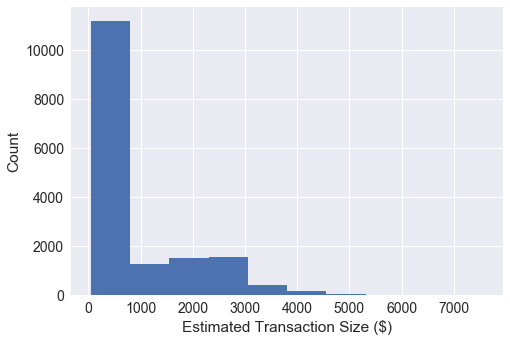

In [346]:
pd.options.display.float_format = '{:,.1f}'.format
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.hist(data_full_with_new_col.estimated_transaction)
ax.set_ylabel('Count')
ax.set_xlabel('Estimated Transaction Size ($)')
plt.show()

In [347]:
data_target_customers = data_full_with_new_col.loc[data_full_with_new_col['rank']>6]
data_target_customers.shape

(4848, 44)

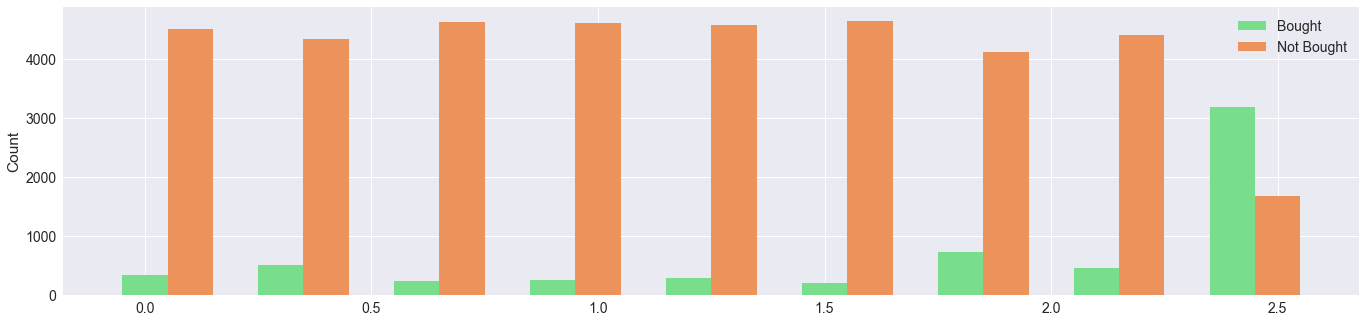

In [372]:
pd.options.display.float_format = '{:,.1f}'.format
desk1=data_target_customers.desk.value_counts()[1]
executive_chair1=data_target_customers.executive_chair.value_counts()[1]
standard_chair1=data_target_customers.standard_chair.value_counts()[1]
monitor1=data_target_customers.monitor.value_counts()[1]
printer1=data_target_customers.printer.value_counts()[1]
computer1=data_target_customers.computer.value_counts()[1]
insurance1=data_target_customers.insurance.value_counts()[1]
toner1=data_target_customers.toner.value_counts()[1]
office_supplies1=data_target_customers.office_supplies.value_counts()[1]
desk0=data_target_customers.desk.value_counts()[0]
executive_chair0=data_target_customers.executive_chair.value_counts()[0]
standard_chair0=data_target_customers.standard_chair.value_counts()[0]
monitor0=data_target_customers.monitor.value_counts()[0]
printer0=data_target_customers.printer.value_counts()[0]
computer0=data_target_customers.computer.value_counts()[0]
insurance0=data_target_customers.insurance.value_counts()[0]
toner0=data_target_customers.toner.value_counts()[0]
office_supplies0=data_target_customers.office_supplies.value_counts()[0]
fig=plt.figure()
ax=fig.add_axes([0,0,3,1])
ax.bar([0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4], [desk1, executive_chair1, standard_chair1, monitor1, printer1, computer1, insurance1, toner1, office_supplies1], width=0.1, color='#78DE8B', align='center', label='Bought')
ax.bar([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5], [desk0, executive_chair0, standard_chair0, monitor0, printer0, computer0, insurance0, toner0, office_supplies0], width=0.1, color='#EC925B', align='center', label='Not Bought')
ax.set_ylabel('Count')
ax.legend()
plt.show()





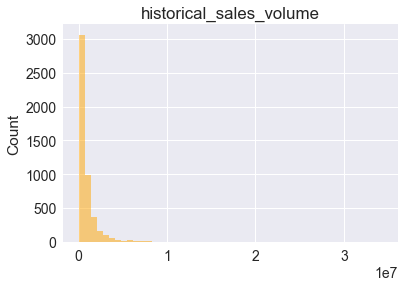

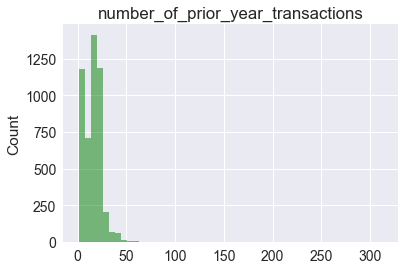

In [365]:
'''
['historical_sales_volume', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'desk', 'executive_chair', 'standard_chair', 'monitor', 'printer',
       'computer', 'insurance', 'toner', 'office_supplies',
       'years_since_first_transaction', 'rm_auto_renew', 'rm_notice', 'ltc_auto_renew', 'ltc_billing',
       'ltc_branch_(phone)', 'ltc_branch_(pos)', 'ltc_it', 'ltc_mail',
       'ltc_phone', 'ltc_unknown', 'ltc_web', 'ltc_int_key', 'avg_emp_count',
       'english', 'other', 'unknown', 'yearly_average_purchase']
'''
pd.options.display.float_format = '{:,.1f}'.format
data_target_customers[['historical_sales_volume']].hist(alpha=0.5,bins=50,color='orange')
plt.ylabel('Count')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
plt.show()

pd.options.display.float_format = '{:,.1f}'.format
data_target_customers[['number_of_prior_year_transactions']].hist(alpha=0.5,bins=50,color='green')
plt.ylabel('Count')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
plt.show()

In [374]:
data_paid[['campaign_period_sales']].describe()

,campaign_period_sales
count,"4,377.0"
mean,908.3
std,"1,146.4"
min,6.6
25%,225.8
50%,375.8
75%,"1,213.6"
max,"8,936.9"
